**Project Description:**

In this lab10 we need to classify whether the patient has heart disease or not. 

Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#load the dataset
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#let's check the shape of dataset
df.shape

(303, 14)

In [4]:
#display the information of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#check if there is any missing values
df.isnull().values.any()

False

In [ ]:
#find unique values
df['target'].unique()

array([1, 0])

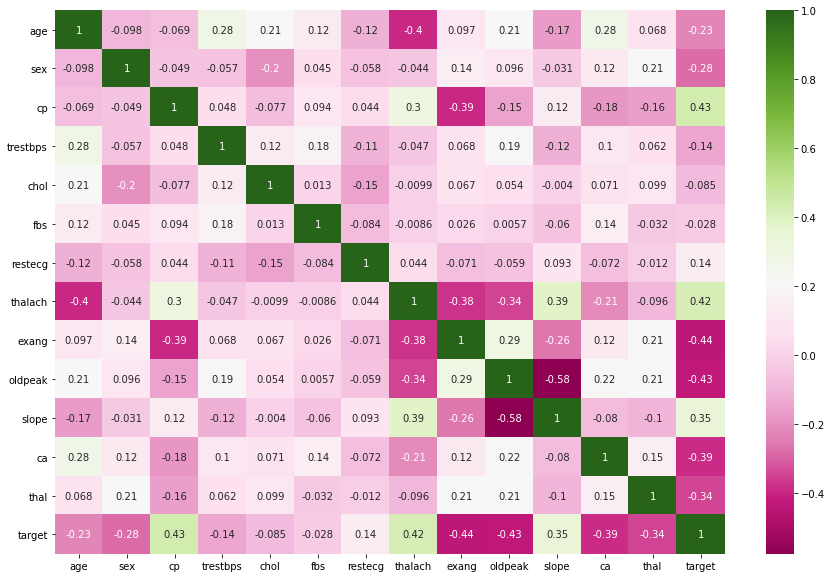

In [ ]:
#let's plto the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

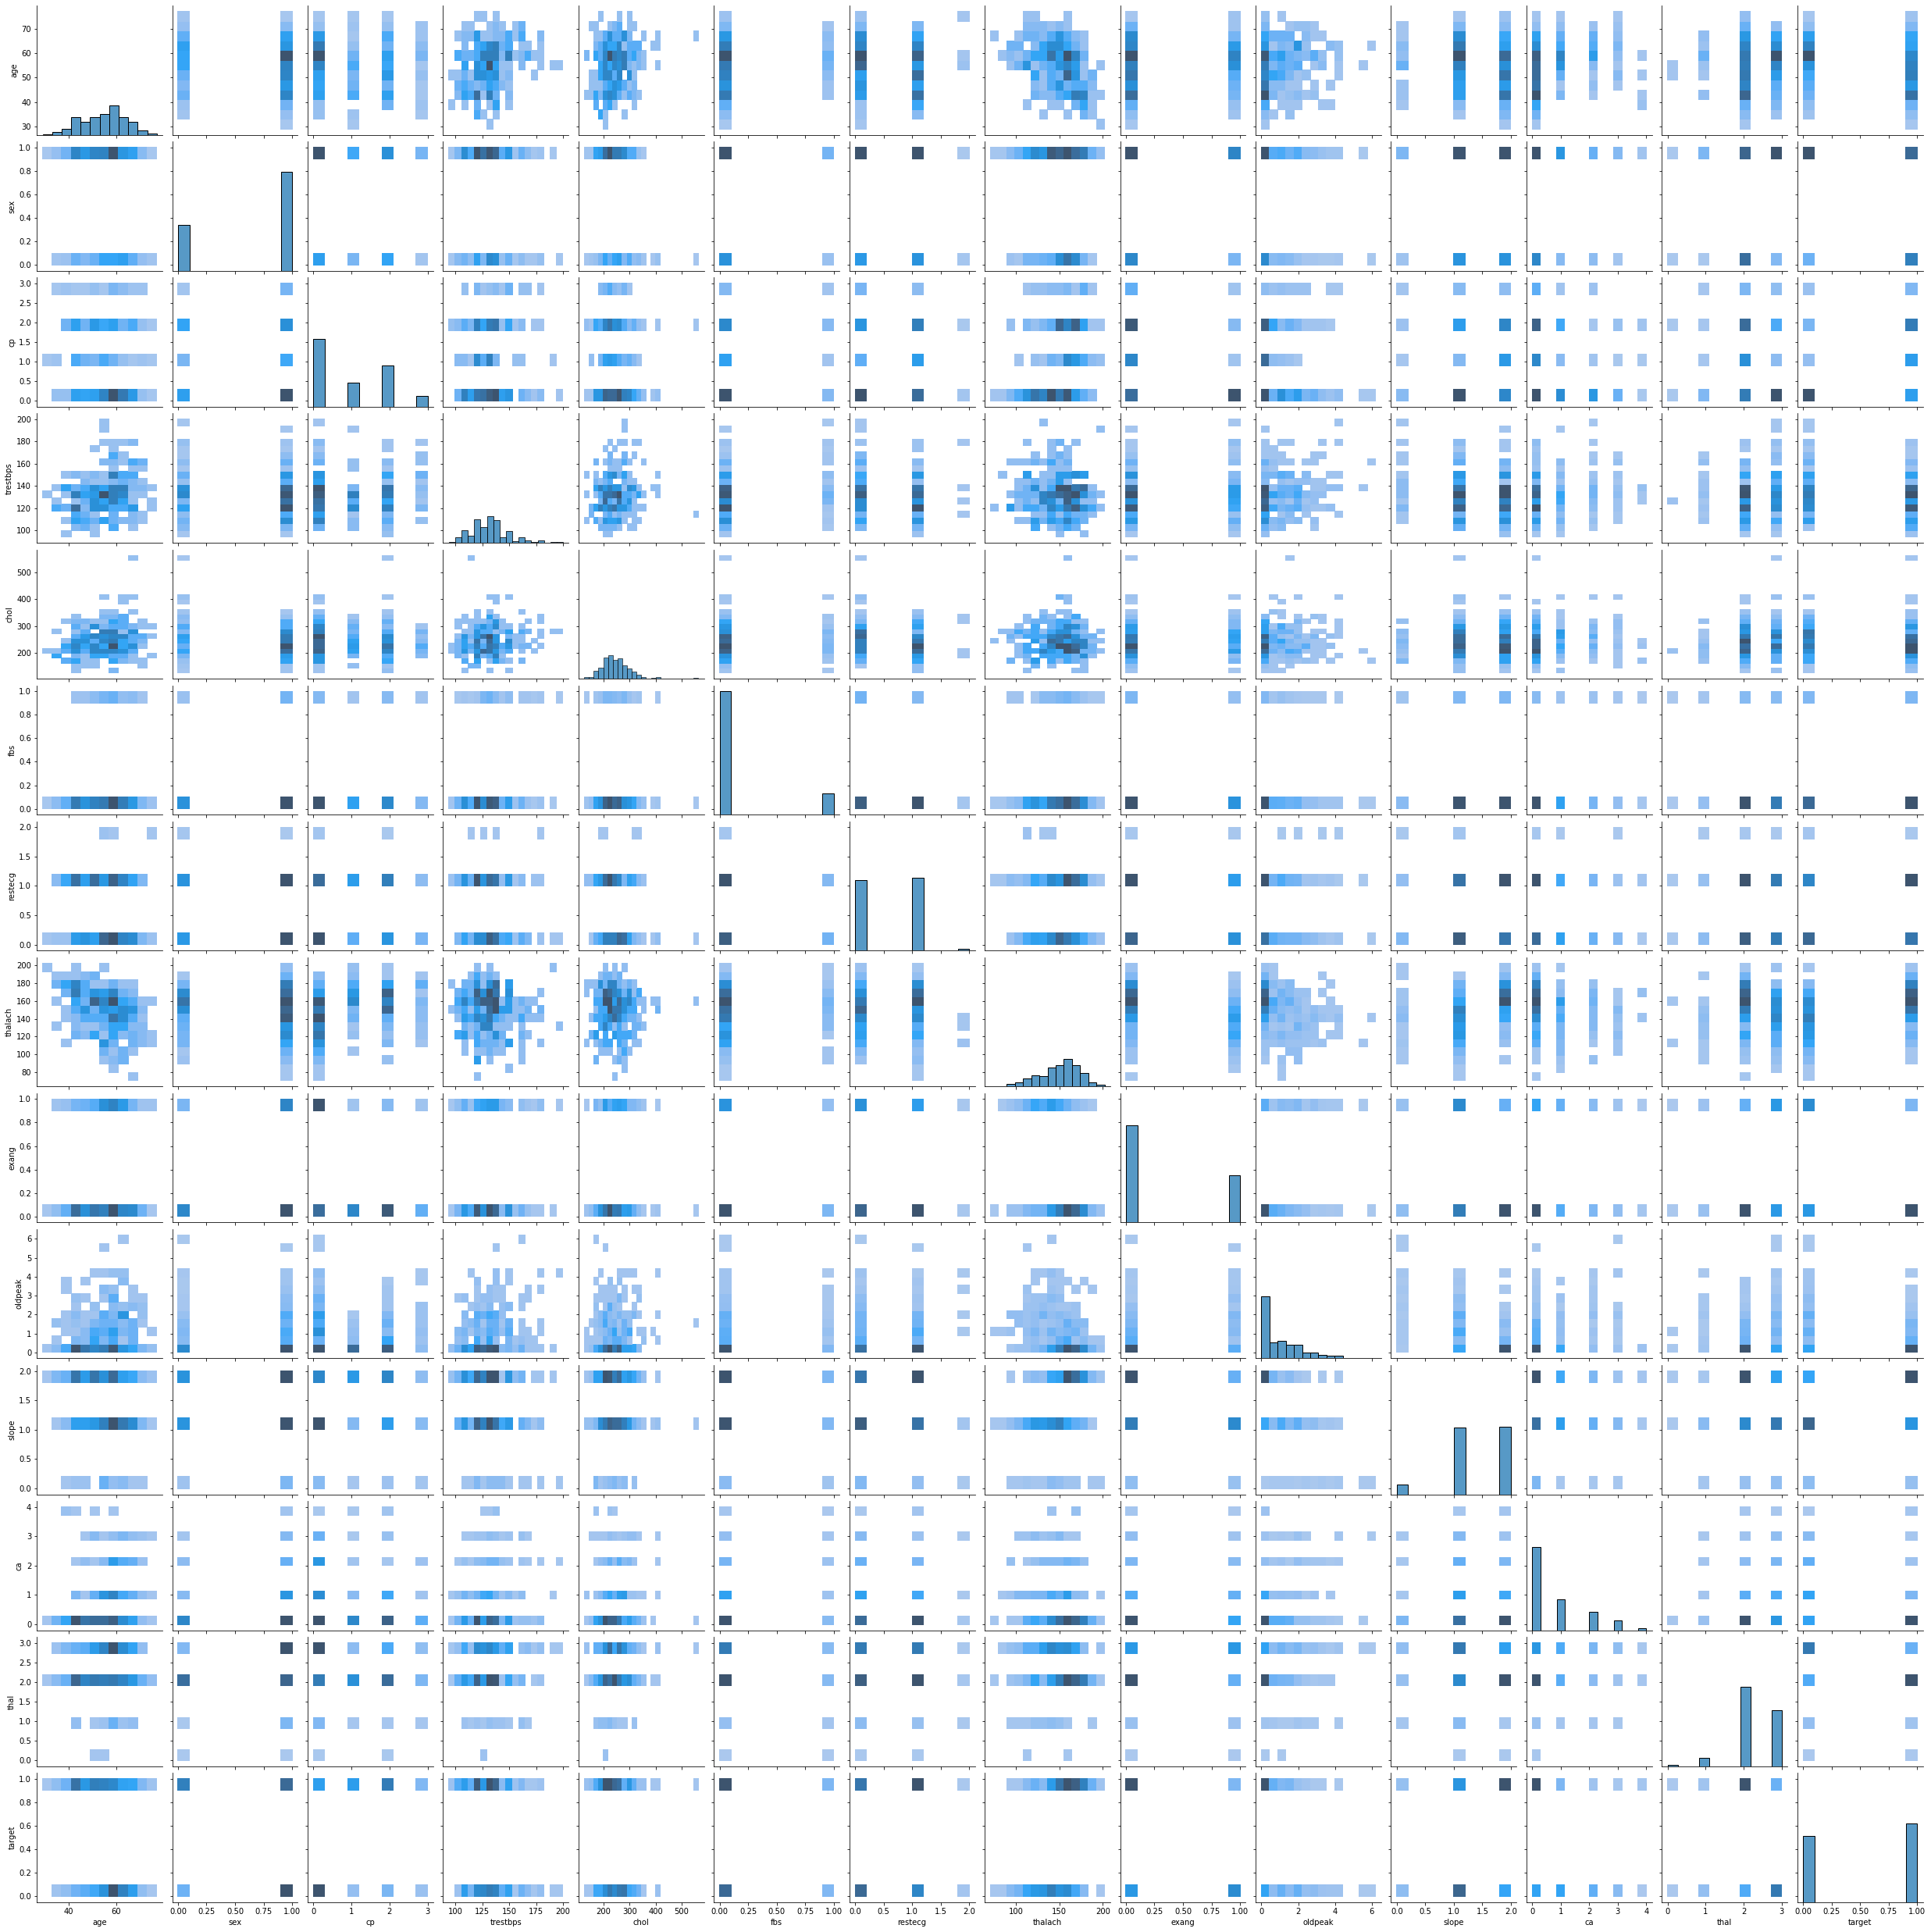

In [ ]:
#displaying the ditribution of the each feature
sns.pairplot(df,kind="hist")

In [ ]:
#checking the distribution of target feature. 
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
#check the correlation of the dataset
df_corr = df.corr()
df_corr['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0, 0.5, 'Distribution')

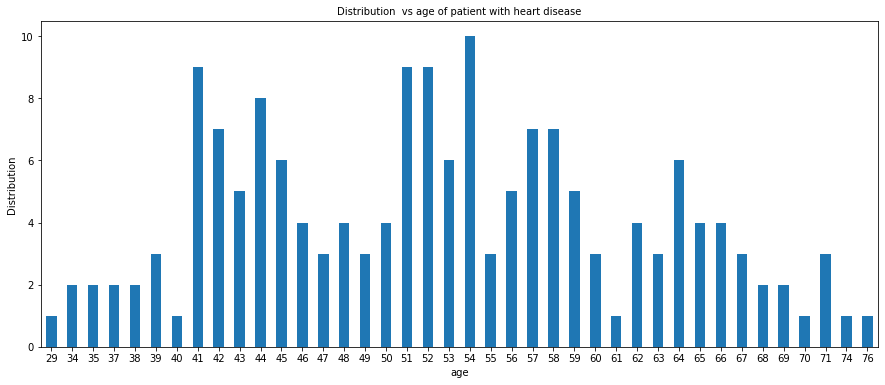

In [7]:
#Plot the frequency of all patients with heart disease
ax = df[df['target'] == 1]['age'].value_counts().sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 10,
    title="Distribution between age of patient with heart disease",
    rot=0)
ax.set_title("Distribution  vs age of patient with heart disease", fontsize=10)
ax.set_xlabel("age", fontsize=10)
ax.set_ylabel("Distribution", fontsize=10)

Text(0, 0.5, 'Count')

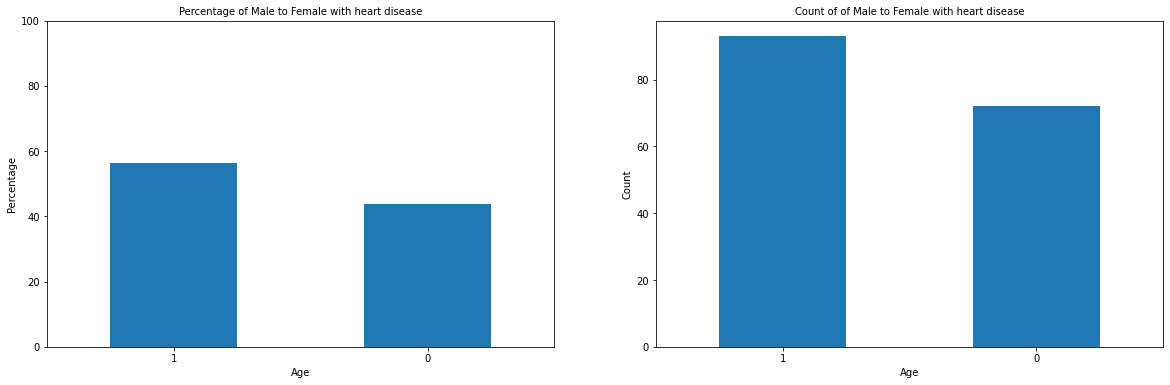

In [8]:
#Plot the precentage of male to female with heart disease
fig, ax_data = plt.subplots(1, 2, figsize=(20, 6))

((df[df['target'] == 1]['sex'].value_counts() / len(df[df['target'] == 1])) * 100).plot.bar(
    rot = 0,fontsize= 10, title='Male to Female Count of Heart Disease', ax=ax_data[0])
ax_data[0].set_title('Percentage of Male to Female with heart disease', fontsize=10)
ax_data[0].set_xlabel("Age", fontsize=10)
ax_data[0].set_ylabel("Percentage", fontsize=10)
ax_data[0].set_ylim([0,100])


#Plot the frequency of Male to Female with heart disease
df[df['target'] == 1]['sex'].value_counts().plot.bar(rot=0, fontsize= 10,title='Male to Female with heart disease',ax=ax_data[1])
ax_data[1].set_title('Count of of Male to Female with heart disease', fontsize=10)
ax_data[1].set_xlabel("Age", fontsize=10)
ax_data[1].set_ylabel("Count", fontsize=10)

In [9]:
#Data Pre-processing
#divide the data to target and features
X = df.drop(['target'], axis=1)
y = df.target

#Encode the data in the features data
X_encoded = pd.get_dummies(df, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [10]:
#splitting thr dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler 
scalar_X = StandardScaler()
X_train = scalar_X.fit_transform(X_train)
X_test = scalar_X.transform(X_test)

In [12]:
#Cretae Logistic regression model and train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
lr_predict = lr.predict(X_test)
lr_predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [14]:
#let's check the performance of model
lr_predict_perf = pd.DataFrame({'Expected':y_test, 'Predicted':lr_predict })
lr_predict_perf.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [15]:
#Let's check the performance using confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, lr_predict)
cm

array([[30,  0],
       [ 0, 31]])

In [16]:
#Accuracy Score of Logistic Model
lr_acc = accuracy_score(y_test, lr_predict) 
lr_acc

1.0

In [17]:
#Let's try SVM model as well
from sklearn.svm import SVC 
svc_model = SVC(kernel = 'linear', random_state = 0)
svc_model.fit(X_train,y_train )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
svc_model = svc_model.predict(X_test)
svc_model

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [19]:
svc_predict_perf = pd.DataFrame({'Expected':y_test, 'Predicted':svc_model })
svc_predict_perf.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [20]:
#Accuracy Score of Logistic Model
svc_acc = accuracy_score(y_test, svc_model) 
svc_acc

1.0

In [21]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
rf_model = rf.predict(X_test)
rf_model

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [23]:
#Accuracy Score of Random Forest Model
rf_acc = accuracy_score(y_test, rf_model) 
rf_acc

1.0

In [24]:
#Save the model
import pickle

In [25]:
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_model, file)

In [26]:
Pkl_svc = "Pickle_svm_Model.pkl"  

with open(Pkl_svc, 'wb') as file:  
    pickle.dump(svc_model, file)

In [27]:
Pkl_lr = "Pickle_lr_Model.pkl"  

with open(Pkl_lr, 'wb') as file:  
    pickle.dump(lr_predict, file)

As per the above all models, svm, random forest, logistic regression all are giving 100% accuracy. Model is prediction correct values. 